# Supprt Vector Regressor

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

In [2]:
from sklearn.svm import SVR

In [6]:
svr = SVR()
svr.fit(X.reshape(-1, 1),y)

C:\Users\Assaad\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

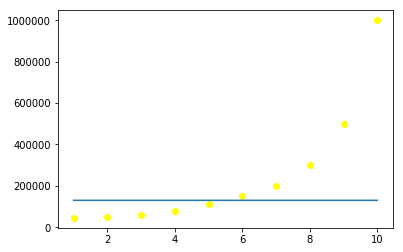

In [9]:
plt.scatter(X,y, color='yellow')
plt.plot(X,svr.predict(X.reshape(-1,1)))

In [10]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid_par = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(svr,grid_par,verbose=3)

In [15]:
grid.fit(X.reshape(-1, 1),y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................... C=0.1, gamma=1, score=-203.557, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..................... C=0.1, gamma=1, score=-3.967, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..................... C=0.1, gamma=1, score=-3.120, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................. C=0.1, gamma=0.1, score=-203.556, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-3.967, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-3.120, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

C:\Users\Assaad\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

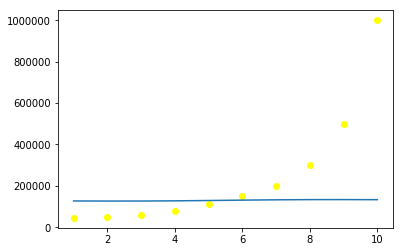

In [13]:
plt.scatter(X,y, color='yellow')
plt.plot(X,grid.predict(X.reshape(-1,1)))

**even after trying to find the best parameters, we find that the results aren't good**
> in this case the problem is in the data scalling!
> the choice of change the scaling of X or y or both is to be tested

In [60]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()
#X = scaler1.fit_transform(X.reshape(-1,1))
y = scaler2.fit_transform(y.reshape(-1,1))

**Applying again SVR**

In [61]:
svr.fit(X.reshape(-1, 1),y)

C:\Users\Assaad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Assaad\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

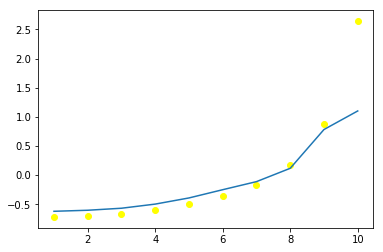

In [62]:
plt.scatter(X,y, color='yellow')
plt.plot(X,svr.predict(X.reshape(-1,1)))

**Since we changed the scale of our feature to do the regression, to test we need to apply the same processing as well**

In [63]:
# scaler2.inverse_transform(svr.predict(scaler1.transform(np.array(6.5).reshape(-1,1))))
scaler2.inverse_transform(svr.predict(np.array(6.5).reshape(-1,1)))

array([199598.35828296])